


# Project: Colours in Astronomy

By: Sarisha Das

In this project we are going to study what is astronomical color. Astronomical color is not as simple as the color that your eyes see. In fact, in astronomy, a color is the difference between the magnitude of a star as seen under different filters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
%matplotlib inline

## Ex-1

### Exercise 1:  Obtain the apparent BVR magnitudes for your programme stars.

All telescopes are different. So first we should approximate the correct magnitude of a star in observation by using a standard star in its vicinity and its magnitude is calculated by comparing it with the standard star in a catalogue by using the simple formula to calculate the transformation constant:

### $\ c=m_{std} - m_{ins} $

We have obtained the transformation constant which we can then use to calculate the magnitude of the star under observation.

### $\ m_{std} =c + m_{ins} $ 
    

We have the following magnitudes:

| Band | Target ins | Standard ins | Standard |
|-|-|-|-|
|B |20.41| 19.86 |16.14|
|V |18.79 |18.37| 14.64|
|R |17.56 |17.33| 13.72|



In [2]:
magnitudes=np.array([[20.41,19.86,16.14],[18.79,18.37,14.64],[17.56,17.33,13.72]])
# calculate the values of c for each filter
c=magnitudes[:,2]-magnitudes[:,1]
# calculate the real values of magnitudes of our observed star
BVR=c+magnitudes[:,0]
print('The BVR values of given star are',BVR)
print('Thus, B-V value comes out to be', np.round((BVR[0]-BVR[1]),2))

The BVR values of given star are [16.69 15.06 13.95]
Thus, B-V value comes out to be 1.63


Magnitude is a number that measures the brightness of a star or galaxy. In magnitude, higher numbers correspond to fainter objects, lower numbers to brighter objects; the very brightest objects have negative magnitudes. As stated before, **Colour** is defined as the *difference between the magnitude of a star in one filter and the magnitude of the same star in a different filter.*

Magnitude is a logarithmic quantity, so we need to calculate B-V by dividing instead of subtracting. The formula for calculating the magnitude is:

## $\ m = -2.5 log(\frac{F_x}{F_{vega}}) $

Vega has been given an arbitary magnitude of 0 across all filters, namely:
$\ U=B=V=R=I=0 $

Thus, vega serves as an arbitary zero point to measure the colors of different stars. A positive magnitude will mean the star is redder than vega and a negative will mean it is bluer than vega.

## Ex-2
###  Spica and Antares are two well-known stars with colour indices (B-V)=0.13 and (B-V)=+1.83.  How many times more blue light (B band) do these objects emit, as compared to its green light (V band)?
### Are your objects bluer or redder than the star Vega, which has B-V=0?

We are given the B-V values for two stars, so we apply the formula to find the ratios of different colors/filters:
$\ \frac{m}{-2.5} = log(\frac{F_B}{F_V}) $ 

In [3]:
BV_spica=-0.13
BV_antares=1.83

def color_ratios(BV):
    exp=(-1)*(BV/2.5)
    return 10**exp

print('Spica is',np.round(color_ratios(BV_spica),2),'times bluer than Vega')
print('Antares is',np.round(color_ratios(BV_antares),2),'times bluer than Vega\n')
#since ratio of antares is negative, it is redder or greener(meaning at a higher wavelength) than Vega, we can write
print('Antares is',np.round((1/color_ratios(BV_antares)),2),'times greener than Vega')

Spica is 1.13 times bluer than Vega
Antares is 0.19 times bluer than Vega

Antares is 5.4 times greener than Vega


## Ex-3
### Exercise 3: Create a programme that obtains the blackbody energy distribution curve for a given temperature. 

The wavelength emitted by a star is closely related to its temperature. We know the formula:

## $ F(\lambda) = \frac{2 \pi c^2 h}{\lambda ^ 5} \frac{1}{e^{\frac{h c}{\lambda k T}}-1} $ 

$\ h= 6.626 $ x $ 10^{-34} J s $

$\ k= 1.381 $ x $ 10^{-23} J K^{-1}$

$\ c= 2.998 $ x $ 10^{8} m s^{-1} $

We take the values of 5000K and 12500K to plot two graphs.

In [4]:
wavelengths=np.arange(100,30000,50)*u.AA
#function to calculate the radiated power
def rp(T,wv=wavelengths):
    exponential = 1/(np.exp(const.h*const.c/(wv*const.k_B*T))-1)
    prefactor = 2*np.pi*const.h*const.c*const.c/wv**5
    return prefactor*exponential
# function to calculate the normalised radiated power, since a hotter star will 
# emit much more energy at all wavelengths than a cold star
def rp_norm(T,wv=wavelengths):
    pwr=rp(T)
    max_=np.max(pwr.value)
    return rp(T,wv)/max_,max_
#function to make it easier to plot
def rp_point_norm(T,wv):
    pwr,peak=rp_norm(T)
    return (((rp((T),wv)).value)/peak)


In [5]:
T1=5000*u.K
radiated_power_5000,peak_wv_5000=rp_norm(T1)
T2=12500*u.K
radiated_power_12500,peak_wv_12500=rp_norm(T2)

In [6]:
#peak wavelengths- to mark the values seen by different filters
peak_B=4420*u.AA
peak_V=5400*u.AA
power=radiated_power_5000.unit

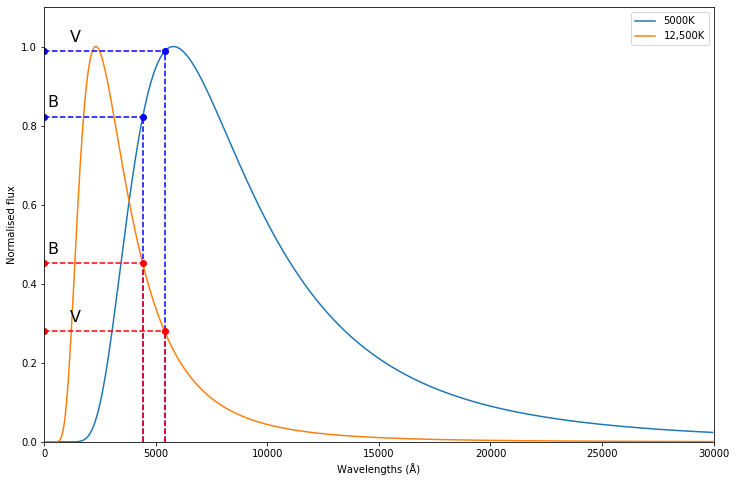

In [7]:
board=plt.figure(figsize=(12,8))
fig=board.add_subplot(1,1,1)
fig.plot(wavelengths,radiated_power_5000,label='5000K')
fig.plot(wavelengths,radiated_power_12500,label='12,500K')

for t,color in zip([T1,T2],['blue','red']):
    for x1 in [peak_B.value,peak_V.value]:
        fig.plot([x1,x1]*u.AA,[0,(rp_point_norm(t,x1*u.AA))]*power, color =color,  linewidth=1.5, linestyle="--")
        fig.plot([0,x1]*u.AA,[(rp_point_norm(t,x1*u.AA)),(rp_point_norm(t,x1*u.AA))]*power, 
                 color =color,  linewidth=1.5, linestyle="--",marker='o')

#annotations
for x1,label in zip([peak_B.value,peak_V.value],['B','V']):
    for t in [T1,T2]:
        fig.annotate(label, xy=(x1, (rp_point_norm(t,(x1*u.AA)))), xycoords='data',
             xytext=(-95, 10), textcoords='offset points', fontsize=16) 

fig.set_xlim([0,30000])
fig.set_ylim([0.0,1.1])
fig.set_xlabel('Wavelengths (Å)')
fig.set_ylabel('Normalised flux')
fig.legend()

As we can see, seen in a blue filter, the 12500K star appears brighter and vice versa when seen under a V filter. We can also confirm that 12500K is hotter than Vega and 5000K is colder than Vega.

## Ex-4
### Exercise 4: Create several blackbody energy distribution curves for 9 different temperatures ranging from 3000K to 20000K (do not forget the curve that corresponds to T=9790 K, Vega’s effective temperature). Taking into account the effective wavelengths for the various filters given bellow, annotate the flux values for each filter and each curve and create a (B-V)-temperature plot. What do you observe? 
### Which end of the line in your graph corresponds to hotter stars? Which corresponds to cooler stars? How do you know?
### Calculate the temperature of Spica and Antares and compare the values that you get with those found in precise measurements. Why are your values of the temperature lower than the real ones? In other words, why are they redder than they should be?


First, I create a series of temperatures and plot them.

In [8]:
temperatures=np.arange(2500,22500,2500)*u.K
samples=len(temperatures)

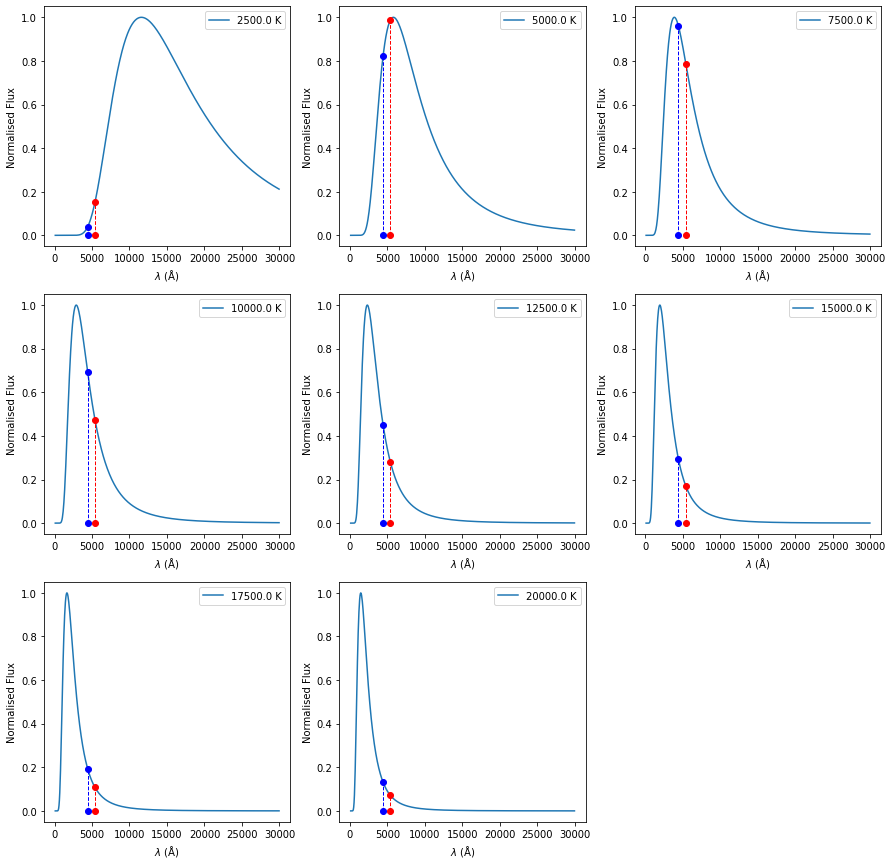

In [9]:
board2=plt.figure(figsize=(15,15))
figures=[1,2,3,4,5,6,7,8,9]
#To try to visualise the effect of increasing the temperature. The blue and red lines correspond to B and V respectively.
for i in range(samples):
    figures[i]=board2.add_subplot(3,3,i+1)
    figures[i].plot(wavelengths,rp_norm(temperatures[i])[0],label=temperatures[i])
    for x1,c in zip([peak_B.value,peak_V.value],['blue','red']):
        figures[i].plot([x1,x1]*u.AA,[0,(rp_point_norm(temperatures[i],x1*u.AA))]*power, color =c,  
                        linewidth=1, linestyle="--",marker='o')
    figures[i].set_xlabel('$\lambda$ (Å)')
    figures[i].set_ylabel('Normalised Flux')
    figures[i].legend()

It is easy to observe that as temperature increases, the flux measured in B filter increases and V decreases. Thus, effectively the value of B/V increases. Since in terms of magnitude we take the negative log, the effective value of B-v decreases and eventually becomes negative as B becomes greater than V. We can plot this increasing difference using a graph and the formula:
## $\ B-V = -2.5 log(\frac{F_B}{F_V} \frac{F_V^{vega}}{F_B^{vega}}) $

In [10]:
T_vega=9790*u.K
FB_vega=rp(T_vega,peak_B)
FV_vega=rp(T_vega,peak_V)
#apply the formula in a function
def BV_peaks(t):
    F_B=rp(t,peak_B)
    F_V=rp(t,peak_V)
    e=(F_B*FV_vega)/(F_V*FB_vega)
    B_V=(-2.5)*(np.log10(e))
    return B_V

Text(0, 0.5, 'temperatures (K)')

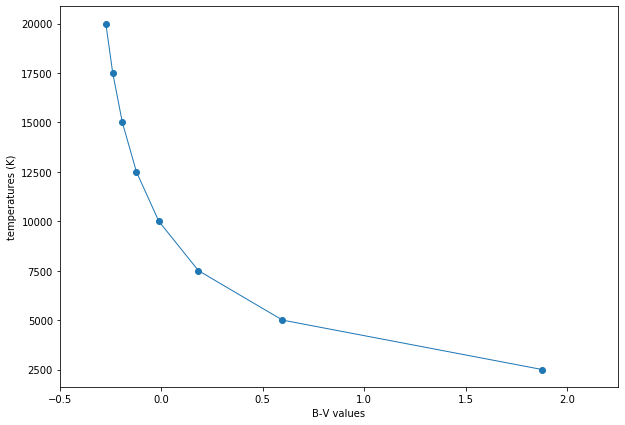

In [11]:
bvs=[]
for i in temperatures:
    bvs.append(BV_peaks(i))
board=plt.figure(figsize=(10,7))
fig3=board.add_subplot(1,1,1)
fig3.plot(bvs,temperatures,marker='o',linewidth='1')
fig3.set_xlim([-0.5,2.25])
fig3.set_xlabel('B-V values')
fig3.set_ylabel('temperatures (K)')

It is an approximate graph. Now i will write a function to estimate the temperatures of Spica and Antares. Since we do not properly know which equation will fit the graph, instead of exactly calculating the parameters of the graph I will write a function which will choose the minimum difference of B-V and calculated B-V values from a range of temperatures. This will give a pretty close approximation.

In [12]:
temps=np.arange(2000,20000,100)*u.K
BVs_from_temp=[]
for temp in temps:
    BVs_from_temp.append(BV_peaks(temp))
BVs_from_temp=np.array(BVs_from_temp)
def temp_from_BV(BV):
    diff=np.abs(BVs_from_temp-BV)
    index=np.where(diff==np.amin(diff))
    return temps[index]

print("Calculated temperature of Spica using B-V value is",temp_from_BV(BV_spica)[0])
print("Calculated temperature of Antares using B-V value is",temp_from_BV(BV_antares)[0])

Calculated temperature of Spica using B-V value is 12700.0 K
Calculated temperature of Antares using B-V value is 2500.0 K


The real values of temperatures of Antares and Spica are 3400K and 18000K respectively. The reason for us getting a lower temperature can be many:
1. We have taken only the peak wavelengths. If we take into account the errors due to the transmission curves of each filter then we can get a more accurate guess.
2. The light goes through numerous instances of scattering. Even if we take an image outside of earth's atmosphere, the Inter stellar medium(ISM) is not a perfect vaccum. It comprises cold neutral gas, warm neutral gas and hot ionised plasma primarily located in the plane of the galaxy in the spiral arms. Cosmic dust is made up of small grains of silicates, iron, carbon, frozen water and ammonia ice 0.1 to 0.01 microns (μm) in size. Although this cosmic dust only makes up 1% of the mass of the ISM, it absorbs and scatters light from stars. This means that light from a distant star is reduced in intensity so that the star appears dimmer than it would be if there was no intervening material. Termed **extinction**, this effect can be estimated if the distance to the star and its position relative to galactic arms and molecular clouds is known. 

Thus our estimate comes a little different than the actual values of temperatures.


## Ex-5

### Exercise 5: Using the blackbody curves obtained in the previous exercise, annotate the wavelength at which the flux is maximum. What do you observe?
### Create a plot of temperature as a function of the λpeak using a logaritmic scale. What do you observe?
### Fit a function (straight line) to the data and calculate Wien’s constant.
### The Sun has a peak wavelength of thermal radiation of 5300 Å. What is the Sun's average temperature? And for the Polar star which has λpeak=3500 Å.

<br><br>
We can see the peak wavelengths of the various temperatures from the previous plots, and we put these values into an array. First I will plot the same graphs on a singlt figure and use a logarithmic scale on both axes. We can more clearly see the linear dependencies in this graph as the peak wavelength continues to decrease with increasing temperature.
The area under each graph also keeps increasing which implies that the hotter star also has an overall greater luminosity as well, i.e. radiates more energy at any given wavelength.

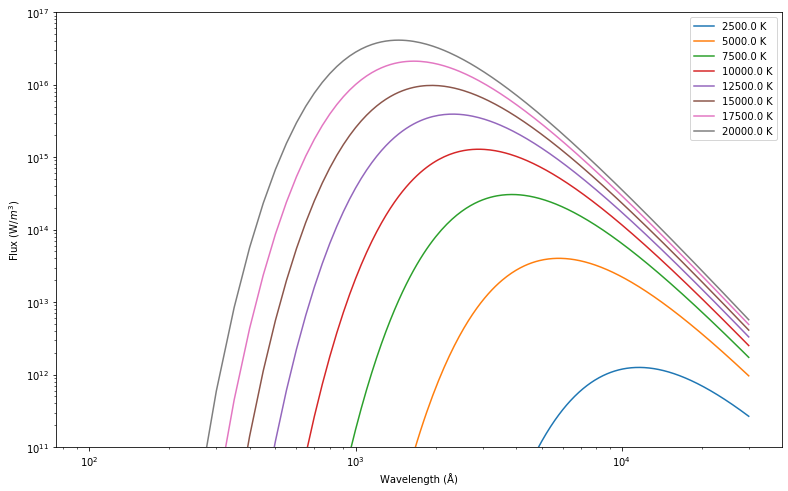

In [13]:
board3=plt.figure(figsize=(13,8))
ax=board3.add_subplot(1,1,1)
for temp in temperatures:
    ax.plot(wavelengths,rp(temp)*(10**50),label=temp)
ax.set_yscale('log')
ax.set_ylabel('Flux (W/$m^3$)')
ax.set_ylim([10**11,10**17])
ax.set_xscale('log')
ax.set_xlabel('Wavelength (Å)')
ax.legend()

Text(0, 0.5, 'log(T) (K)')

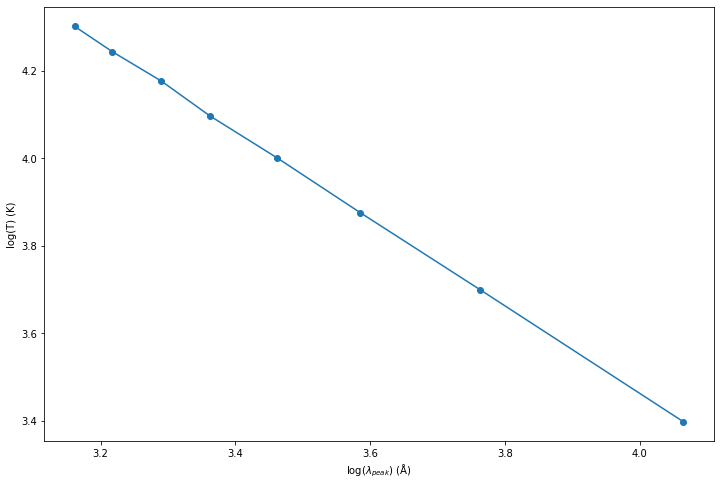

In [14]:
peak_wls=np.zeros(len(temperatures))*u.AA
for i in range(len(temperatures)):
    values=rp(temperatures[i])
    max_index=np.where(np.amax(values)==values)
    peak_wls[i]=(wavelengths[max_index])
peak_wls=np.array(peak_wls.value)
board4=plt.figure(figsize=(12,8))
fig=board4.add_subplot(1,1,1)
fig.plot(np.round(np.log10(peak_wls),4),np.round(np.log10(temperatures.value),4),marker='o')
fig.set_xlabel('log($\lambda_{peak}$) (Å)')
fig.set_ylabel('log(T) (K)')

In [15]:
from scipy.optimize import curve_fit
def linear(x,m,c):
    return m*x+c
p_opt,p_cof=curve_fit(linear,np.log10(peak_wls),np.log10(temperatures.value))
m=p_opt[0]
c=p_opt[1]
print(np.round(m,4),np.round(c,4))

-0.9999 7.4616


After fitting a curve we have obtained the equation for the straight line we previously plotted:
we know $\ log(T)=m(log(\lambda))+c $

$\ T=10^c \lambda^m $

We can easily observe that m is approximately (-1). Thus rearranging we can get:

$\ T \lambda=10^c $

In [16]:
#To calculate wiens constant
wiens_const_AK=(10**c)*(u.AA*u.K)#in angstrom-K
wiens_const=wiens_const_AK.to(u.m*u.K)
print("Calculated value of Wien's constant is",wiens_const)

Calculated value of Wien's constant is 0.0028946150854271915 K m


That is the approximate value of wiens constant:
$\ 2.895$ x $\ 10^{-3} m K $

which we can compare with the standard value of:
$\ 2.867$ x $\ 10^{-3} m K $

Thus we have a relation between temperature and peak wavelengths:

### $\ T \lambda_{peak}=\ 2.895$ x $\ 10^{-3} m K $

In [17]:
#Finally a function to calculate the temperature from peak wavelength
def temp_from_peak_wv(wv):
    wv.to(u.m)
    return wiens_const/wv
peak_wv_sun=5300*u.AA
peak_wv_ps=3500*u.AA

print("temperature of sun using wien's law is",np.round(temp_from_peak_wv(peak_wv_sun).to(u.K),2))
print("temperature of pole star using wien's law is",np.round(temp_from_peak_wv(peak_wv_ps).to(u.K),2))

temperature of sun using wien's law is 5461.54 K
temperature of pole star using wien's law is 8270.33 K


So we can calculate the temperatures of stars using this technique as well. The actual temperature of sun is 5778K and we have a similar error of a lower calculated temperature due to errors listed previously.

In [18]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

In [19]:
V1=fits.open('M32_V_ExpTime60s_1.fit')[0].data
V2=fits.open('M32_V_ExpTime60s_2.fit')[0].data
V3=fits.open('M32_V_ExpTime60s_3.fit')[0].data
B1=fits.open('M32_B_ExpTime180s_1.fit')[0].data
B2=fits.open('M32_B_ExpTime180s_2.fit')[0].data
B3=fits.open('M32_B_ExpTime180s_3.fit')[0].data
R1=fits.open('M32_R_ExpTime60s_1.fit')[0].data
R2=fits.open('M32_R_ExpTime60s_2.fit')[0].data
R3=fits.open('M32_R_ExpTime60s_3.fit')[0].data
V=[V1,V2,V3]
B=[B1,B2,B3]
R=[R1,R2,R3]
IMG=[B,V,R]

In [20]:
BN=fits.open('NormFlatB.fit')[0].data
RN=fits.open('NormFlatR.fit')[0].data
VN=fits.open('NormFlatV.fit')[0].data
N=[BN,VN,RN]
MB=fits.open('MasterBias.fit')[0].data

In [21]:
Reduced_images=[]
for i in range(3):
    for img in IMG[i]:
        filterimage=[]
        filterimage.append((img-MB)/(N[i]))
    Reduced_images.append(np.median(filterimage,axis=0))

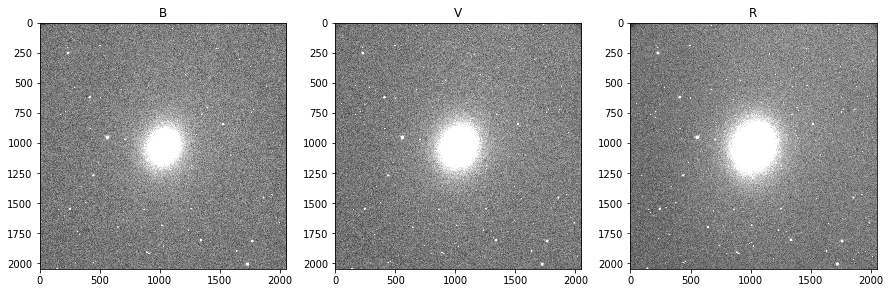

In [24]:
board2=plt.figure(figsize=(15,12))
for i,t in zip(range(3),['B','V','R']):
    data=Reduced_images[i]
    mean,median,std=sigma_clipped_stats(data)
    fig2=board2.add_subplot(1,3,i+1)
    fig2.imshow(data, vmin=median-6*std,vmax=median+6*std,cmap='gray')
    fig2.set_title(t)

We can see side by side that there are subtle differences in three filters: it is most brightest in R filter so this galaxy will be redder than Vega and thus overall temparature should be <10000K.